# 와인 품질 예측 모델 만들기 2

1. 선형 회귀 모델 적용하는 방법살펴보기
2. 리지 회귀 모델의 특징 이해, 모델적용 방법 살펴보기
3. 라쏘 회귀모델의 특징 이해, 모델 적용방법 살펴보기



In [1]:
import pandas as pd
import numpy as np

In [2]:
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';', header=0)
redwine["type"] = 'red'

whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';', header=0)
whitewine["type"] = 'white'

wine = redwine.append(whitewine)

wine.columns = wine.columns.str.replace(" ", "_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 선형 회귀 모델 적용
- 모델 클래스와 모델 파라미터 선택

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [5]:
# 특징 행렬(입력)과 대상 벡터(정답)의 추출
X = wine.drop(['type', 'quality'], axis=1)
# 데이터프레임 wine의 type과 quality를 제외한 X 특징 행렬 생성
X.shape
# 훈련 데이터 크기 6797, 11개 열로 X는 m x n 형태를 띔

(6497, 11)

In [6]:
y = wine.quality
# 시리즈 형태
y.shape

# DataFrame과 Series 모두 넘파이 기반으로 scikit-learn api를 사용하기 위해 
# DataFrame 객체에서 특징 행렬과 특징 벡터 추출

(6497,)

In [7]:
from sklearn.model_selection import train_test_split
#X 특징행렬(대문자:2차원), y 대상벡터(소문자: 1차원)를 각각 훈련용 테스트용 으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
                                    #test_size= 테스트크기를 정할수 있음. deafalt값은 0.25
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [8]:
model.fit(X_train, y_train)
# 훈련용 데이터 훈련

LinearRegression()

> 파라미터 :학습과정에서 자동 설정되는 매개변수<br>
> 하이퍼파라미터 : 개발자가 모델을 제어하기 위해 사용하는 값

In [9]:
model.coef_
# 다중선형 회귀, .coef_ 11개의 변수(계수) 확인가능

array([ 5.55618691e-02, -1.29945358e+00, -1.08205046e-01,  4.52070539e-02,
       -3.95901596e-01,  5.76479819e-03, -2.47760359e-03, -5.30023471e+01,
        3.50283862e-01,  7.49149475e-01,  2.78530060e-01])

In [10]:
# intercept_ : 상수항 값
model.intercept_

54.058003854665216

In [11]:
# 모델을 새로운 데이터에 적용
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])

In [12]:
model.predict(np.reshape(newdata, (1, 11))) # 2차원 배열구조를 전달하기 위해 reshape으로 1행 11열 구조를 만듬
# 예측값을 얻음

array([5.27273597])

In [13]:
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

## 모델의 성능 측정

- 회귀 모델의 예측 능력 평가 지표 : 
> 평균 제곱근 오차 RMSE(Root Mean Square Error)
- 평균 제곱근 오차는 분산의 제곱근, 즉 표준 오차가 됨

> 성능 지표는 변수(특징)이 많아지면 값이 커지는 문제가 있음
- 성능 지표의 문제를 개선한 평균 제곱근 오차 사용
> RMSE(예측값)
- 0에 가까울수록 예측도가 높아짐

In [14]:
def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred)** 2))

In [15]:
np.round(rmse(y_test, y_pred), 2)

0.73

In [16]:
from sklearn.metrics import mean_squared_error
# mean_squared_error 이 위 함수와 같은 역할을 함
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

0.73

In [17]:
# 규제가 있는 선형 회귀 모델

from sklearn.model_selection import train_test_split

X = wine.drop(["type", "quality"], axis=1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

0.725

In [19]:
# 규제가 있는 선형회귀 모델
# 리지
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.05) # 알파가 규제값
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

0.727

In [20]:
# 규제가 있는 선형회귀 모델
# 라쏘
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.05) # 알파가 규제값
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

0.761

## 규제가있는 선형 회귀 모델의 필요성

1. 과분산 모델(모델복잡도가 높음:차수가 높아짐)에 대해 모델을 규제(차수를 감소시킴)하면 오버피팅을 감소시킬 수 있음
2. 규제란 오버피팅된 파라미터 값에 대해 페널티를 부여하는 것
3. 페널티를 추가하게 되면 규제가 없는 회귀모델보다 계수의 절대값이 작아지게 되는 원리를 이용해 오버피팅을 방지할 수 있음
4. 페널티를 가한다는 것은 편향을 높인다는 것을 의미하며, 규제가 없는 모델보다 훈련 데이터와 적합도가 떨어지지만, 전체적인 결과는 좋아짐
5. 오버피팅된 모델은 지나친 노이즈(이상치 까지)를 반영할 수 있으므로 모델을 단순화하여 좀 더 일반화된 모델로 만들 필요가 있음

> 규제를 두어 모델을 단순화 할 수 있는 선형 회귀 모델이 필요함

<ipython-input-33-5222c5b6d99c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


Text(0.5, 1.0, 'ridge: alpha = 0.05, rmnse = 0.727')

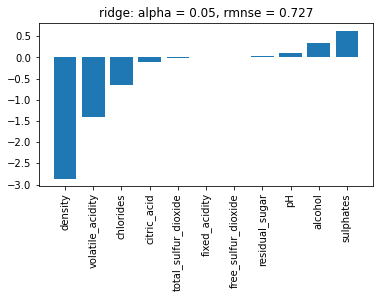

In [33]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

model_name = 'ridge'
alpha = 0.05
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title(f'{model_name}: alpha = {alpha}, rmnse = {rmse}')

<ipython-input-41-79ce50c20b27>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


Text(0.5, 1.0, 'ridge: alpha = 100, rmnse = 0.727')

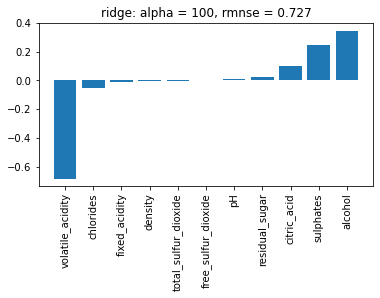

In [41]:

alpha = 100
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title(f'{model_name}: alpha = {alpha}, rmnse = {rmse}')

<ipython-input-54-f0ddadf68c66>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


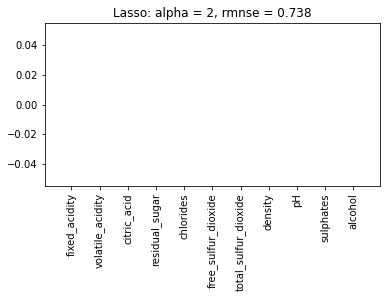

In [54]:
# 라쏘 회귀모델

from sklearn.linear_model import Lasso


model_name = 'Lasso'
alpha = 2 # 2가넘어가니 값이 다 사라짐
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=lasso.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title(f'{model_name}: alpha = {alpha}, rmnse = {rmse}');